# **SMS Span Detection using Naive Bayes Classifier**

# Importing the Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

# EDA

In [3]:
raw_data = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING MAY/DAY3_SMS_SPAM_DETECTION/SMSSpamCollection',sep='\t',names=['label','message'])

In [4]:
raw_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df = raw_data.copy()
df['label'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, shuffle=True, random_state=0)

# Naive-Bayes Classifier with CountVectorizer()

In [7]:
count_vectorizer = CountVectorizer()

In [8]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

Accuracy scores for CountVectorizer on: 
Training data : 0.994
Test data : 0.988

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0      0.990     0.997     0.993       955
           1      0.980     0.938     0.958       160

    accuracy                          0.988      1115
   macro avg      0.985     0.967     0.976      1115
weighted avg      0.988     0.988     0.988      1115




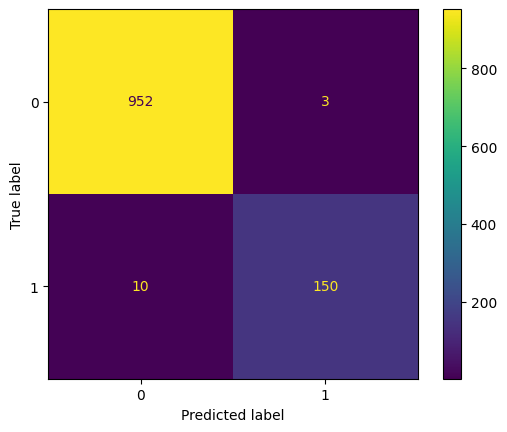

In [9]:
naive_bayes_count = MultinomialNB(alpha=0.5)
naive_bayes_count.fit(X_train_count,y_train)

y_train_pred_count = naive_bayes_count.predict(X_train_count)
y_test_pred_count = naive_bayes_count.predict(X_test_count)

print(f"Accuracy scores for CountVectorizer on: \nTraining data : {accuracy_score(y_train, y_train_pred_count):.3f}\nTest data : {accuracy_score(y_test, y_test_pred_count):.3f}\n")

print(f"CLASSIFICATION REPORT:\n{classification_report(y_test,y_test_pred_count, digits=3)}\n")

cm_count = confusion_matrix(y_test,y_test_pred_count)
disp = ConfusionMatrixDisplay(cm_count)
disp.plot()
plt.grid(False)

In [10]:
cv_scores_count = cross_val_score(naive_bayes_count, X_train_count, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for NB using CountVectorizer : ", [round(x,3) for x in cv_scores_count])
print(f"Average Cross-Validation Score : {cv_scores_count.mean():.3f}")

Cross-Validation Scores for NB using CountVectorizer :  [0.982, 0.974, 0.982, 0.981, 0.983]
Average Cross-Validation Score : 0.980


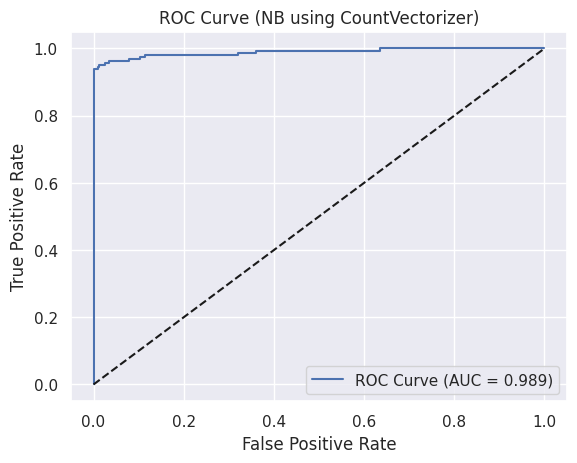

In [11]:
y_pred_prob = naive_bayes_count.predict_proba(X_test_count)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

sns.set()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (NB using CountVectorizer)')
plt.legend(loc='lower right')
plt.show()

# Naive-Bayes Classifier with TfidfVectorizer

In [12]:
tfidf_vectorizer = TfidfVectorizer()

In [13]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Accuracy scores for TfidfVectorizer on: 
Training data : 0.987
Test data : 0.984

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0      0.982     1.000     0.991       955
           1      1.000     0.887     0.940       160

    accuracy                          0.984      1115
   macro avg      0.991     0.944     0.966      1115
weighted avg      0.984     0.984     0.983      1115




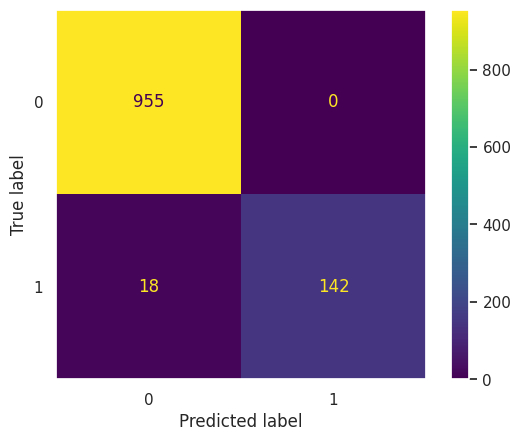

In [14]:
naive_bayes_tfidf = MultinomialNB(alpha=0.5)
naive_bayes_tfidf.fit(X_train_tfidf,y_train)

y_train_pred_tfidf = naive_bayes_tfidf.predict(X_train_tfidf)
y_test_pred_tfidf = naive_bayes_tfidf.predict(X_test_tfidf)

print(f"Accuracy scores for TfidfVectorizer on: \nTraining data : {accuracy_score(y_train, y_train_pred_tfidf):.3f}\nTest data : {accuracy_score(y_test, y_test_pred_tfidf):.3f}\n")

print(f"CLASSIFICATION REPORT:\n{classification_report(y_test,y_test_pred_tfidf, digits=3)}\n")

cm_tfidf = confusion_matrix(y_test,y_test_pred_tfidf)
disp = ConfusionMatrixDisplay(cm_tfidf)
disp.plot()
plt.grid(False)

In [15]:
cv_scores_tfidf = cross_val_score(naive_bayes_tfidf, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for NB using TfidfVectorizer : ", [round(x,3) for x in cv_scores_tfidf])
print(f"Average Cross-Validation Score : {cv_scores_tfidf.mean():.3f}")

Cross-Validation Scores for NB using TfidfVectorizer :  [0.975, 0.972, 0.975, 0.971, 0.978]
Average Cross-Validation Score : 0.974


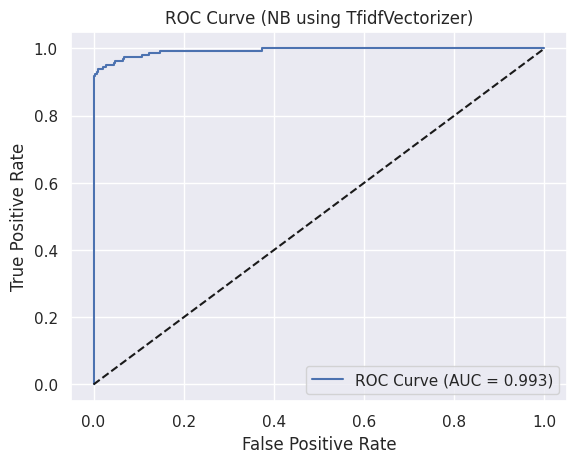

In [16]:
y_pred_prob = naive_bayes_tfidf.predict_proba(X_test_tfidf)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (NB using TfidfVectorizer)')
plt.legend(loc='lower right')
plt.show()